In [33]:
# Import the necessary libraries for the project

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [95]:
# Phase 1: Data Collection 
import pandas as pd

# Set display options
pd.set_option("expand_frame_repr", False)

# Load the dataset (make sure the filename is correct and enclosed in quotes)
df = pd.read_csv('Ass2_DataSet.csv')

selected_columns = [
    'experience', 'OrganisationalBehaviour', 'rSprintManagement',
    'Relativeadvantage', 'Training', 'Specialization', 'Recognition',
    'Customercollaboration', 'Compatibility', 'Escalationofcommitment',
    'Complexity', 'rTeamwork', 'ResourceManagement', 'rOverEngineering',
    'adoption'
]

# Create df2 with only the selected columns
df2 = df[selected_columns]
df3 = df[selected_columns]

# Display the DataFrame
df


,A1,A2,A3,B1,B2,B3,B4,C1_1,C1_2,C1_3,...,rD1_11,rD1_10,rD1_12,rD1_9,rC1_10,rC1_11,rC1_9,rC1_8,rC1_12,ProvinceMappingToB1
0,1,3,6,1,1,4,4,7,7,6,...,2,2,2,2,5,5,2,6,1,Eastern Cape
1,1,4,5,1,2,4,3,3,3,3,...,4,4,4,4,5,6,6,6,6,Eastern Cape
2,1,2,4,1,2,3,1,7,6,4,...,2,2,2,2,6,4,2,2,2,Eastern Cape
3,1,4,4,1,2,4,3,6,6,5,...,3,4,4,4,4,4,4,4,1,Eastern Cape
4,1,4,4,1,2,4,3,3,7,5,...,2,2,5,3,7,5,6,6,4,Eastern Cape
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1,6,5,9,2,6,3,7,6,6,...,3,3,4,2,6,4,6,4,3,Western Cape
203,1,5,6,9,6,7,7,7,7,7,...,2,2,1,1,6,7,6,6,6,Western Cape
204,1,3,5,9,5,6,2,6,6,6,...,2,2,2,2,6,6,6,6,2,Western Cape
205,1,5,5,9,2,4,3,6,7,7,...,1,1,1,1,4,4,4,2,2,Western Cape


In [177]:
df.shape

(207, 137)

In [39]:
#data types
df.dtypes

A1                      int64
A2                      int64
A3                      int64
B1                      int64
B2                      int64
                        ...  
rC1_11                  int64
rC1_9                   int64
rC1_8                   int64
rC1_12                  int64
ProvinceMappingToB1    object
Length: 137, dtype: object

In [9]:
# --- Numeric visualizations (count, mean, and standard deviation,min ,max ,75,25,&50) --- #
df.describe()

,A1,A2,A3,B1,B2,B3,B4,C1_1,C1_2,C1_3,...,rD1_20,rD1_11,rD1_10,rD1_12,rD1_9,rC1_10,rC1_11,rC1_9,rC1_8,rC1_12
count,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1.0,4.420290,4.710145,4.932367,5.594203,4.743961,3.125604,6.130435,6.289855,5.980676,...,4.811594,2.845411,3.004831,3.033816,2.386473,5.091787,4.787440,4.565217,4.487923,3.135266
std,0.0,1.132989,0.832031,2.856651,14.832383,1.313540,1.485748,1.423585,1.319401,1.507139,...,1.940439,1.593453,1.617554,1.693453,1.416070,1.865965,1.875555,1.921859,2.028582,1.910894
min,1.0,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.0,4.000000,4.000000,3.000000,2.000000,4.000000,2.000000,6.000000,6.000000,6.000000,...,3.000000,2.000000,2.000000,2.000000,1.000000,4.000000,3.000000,3.000000,3.000000,2.000000
50%,1.0,5.000000,5.000000,3.000000,2.000000,5.000000,3.000000,7.000000,7.000000,7.000000,...,5.000000,3.000000,3.000000,3.000000,2.000000,6.000000,5.000000,5.000000,5.000000,3.000000
75%,1.0,5.000000,5.000000,9.000000,5.000000,6.000000,4.000000,7.000000,7.000000,7.000000,...,6.000000,4.000000,4.000000,4.000000,3.000000,7.000000,7.000000,6.000000,6.000000,4.000000
max,1.0,7.000000,6.000000,9.000000,99.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


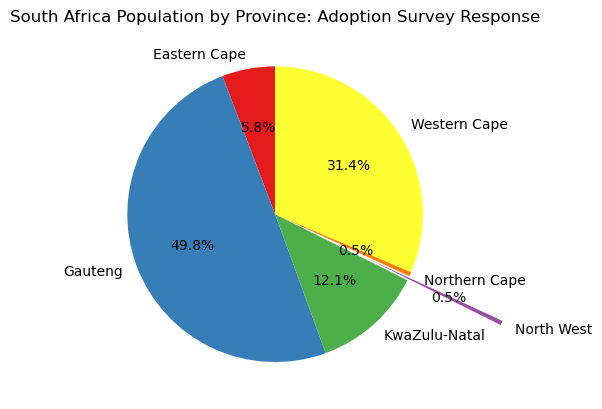

In [11]:
# Visuals by province percentage
province_population = df.groupby('ProvinceMappingToB1').size()
provinces = ['Eastern Cape', 'Gauteng', 'KwaZulu-Natal', 'North West', 'Northern Cape', 'Western Cape']
# only "explode" the 4th  (i.e. 'North West')
explode = (0, 0, 0, 0.7, 0, 0)  

plt.pie(province_population, explode=explode, labels=provinces, autopct='%1.1f%%',
         startangle=90, colors=sns.color_palette("Set1"))
plt.title('South Africa Population by Province: Adoption Survey Response')
plt.show()

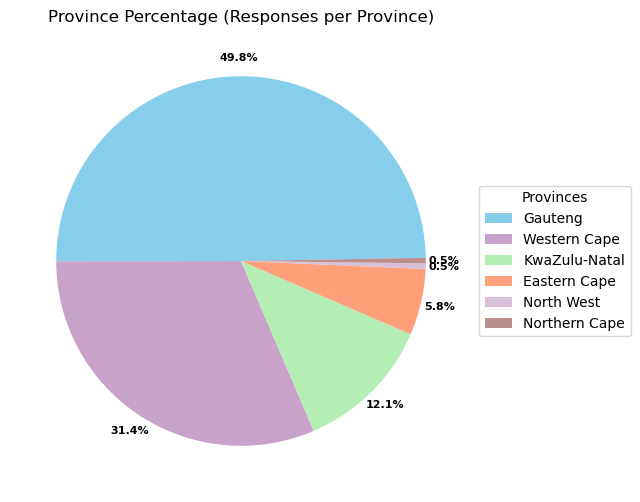

In [65]:
# Count the occurrences of each province
province_counts = df['ProvinceMappingToB1'].value_counts()

# Calculate percentages
province_percentages = (province_counts / province_counts.sum()) * 100



# Create a pie chart with labels outside
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(province_percentages, autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2, startangle=1, colors=colors)
plt.setp(autotexts, size=8, weight="bold")
ax.legend(wedges, province_percentages.index, title="Provinces", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Province Percentage (Responses per Province)')
plt.show()

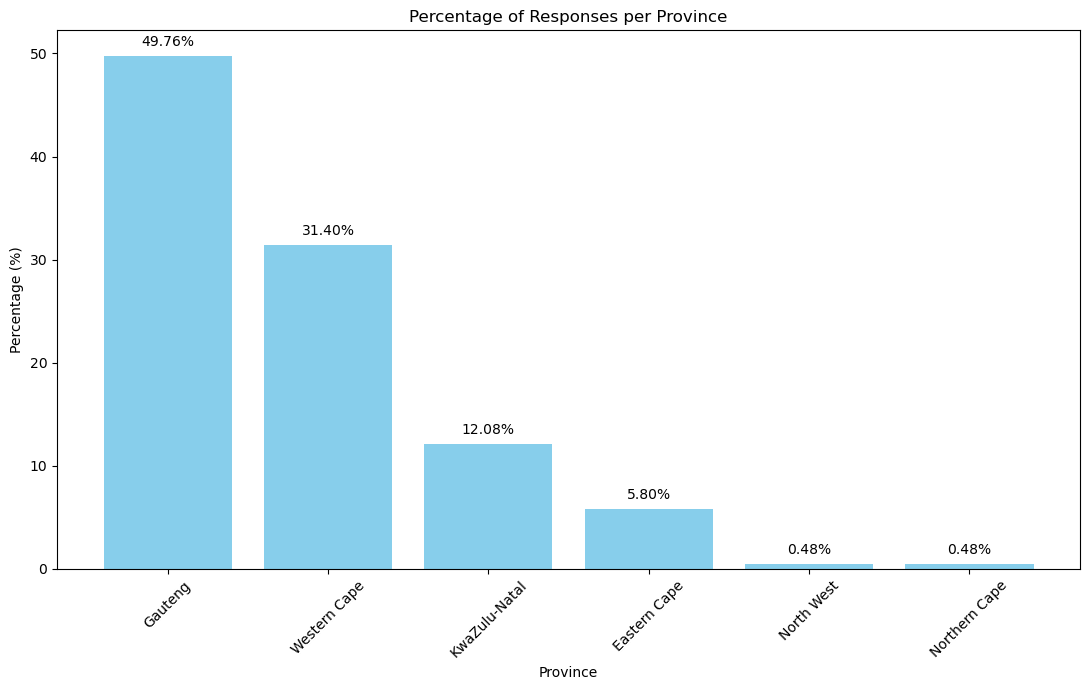

In [67]:
# Count the occurrences of each province
province_counts = df['ProvinceMappingToB1'].value_counts().reset_index()
province_counts.columns = ['Province', 'Count']

# Calculate percentages
province_percentages = (province_counts['Count'] / province_counts['Count'].sum()) * 100


# Create a bar chart to visualize the province percentages
plt.figure(figsize=(11, 7))
bars = plt.bar(province_counts['Province'], province_percentages, color='skyblue')
plt.xlabel('Province')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Responses per Province')

# Show the chart
plt.xticks(rotation=45)  # Rotate the province labels for better readability

# Add percentages as labels above the bars with padding
for bar, percentage in zip(bars, province_percentages):
    height_padding = 2 if percentage == 49.76 else 1  # Add more padding for 49.76%
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + height_padding, f'{percentage:.2f}%', ha='center')

plt.tight_layout()
plt.show()

In [21]:
#shows all columns in datset
df.columns


Index(['Category', 'Value'], dtype='object')

In [71]:
# Create a mapping dictionary
mapping = {
    1: 'Software Architect',
    2: 'Software Developer/Engineer',
    3: 'Project Manager',
    4: 'Business Analyst',
    5: 'Quality Assurance',
    6: 'Scrum Master',
    7: 'Top Management',
    99: 'Other'
}

# Apply the mapping to create a new column with names
df['JobTitle'] = df['B2'].map(mapping)

# Display the DataFrame
df

     A1  A2  A3  B1  B2  B3  B4  C1_1  C1_2  C1_3  ...  rD1_10  rD1_12  rD1_9  rC1_10  rC1_11  rC1_9  rC1_8  rC1_12  ProvinceMappingToB1                     JobTitle
0     1   3   6   1   1   4   4     7     7     6  ...       2       2      2       5       5      2      6       1         Eastern Cape           Software Architect
1     1   4   5   1   2   4   3     3     3     3  ...       4       4      4       5       6      6      6       6         Eastern Cape  Software Developer/Engineer
2     1   2   4   1   2   3   1     7     6     4  ...       2       2      2       6       4      2      2       2         Eastern Cape  Software Developer/Engineer
3     1   4   4   1   2   4   3     6     6     5  ...       4       4      4       4       4      4      4       1         Eastern Cape  Software Developer/Engineer
4     1   4   4   1   2   4   3     3     7     5  ...       2       5      3       7       5      6      6       4         Eastern Cape  Software Developer/Engineer
..  

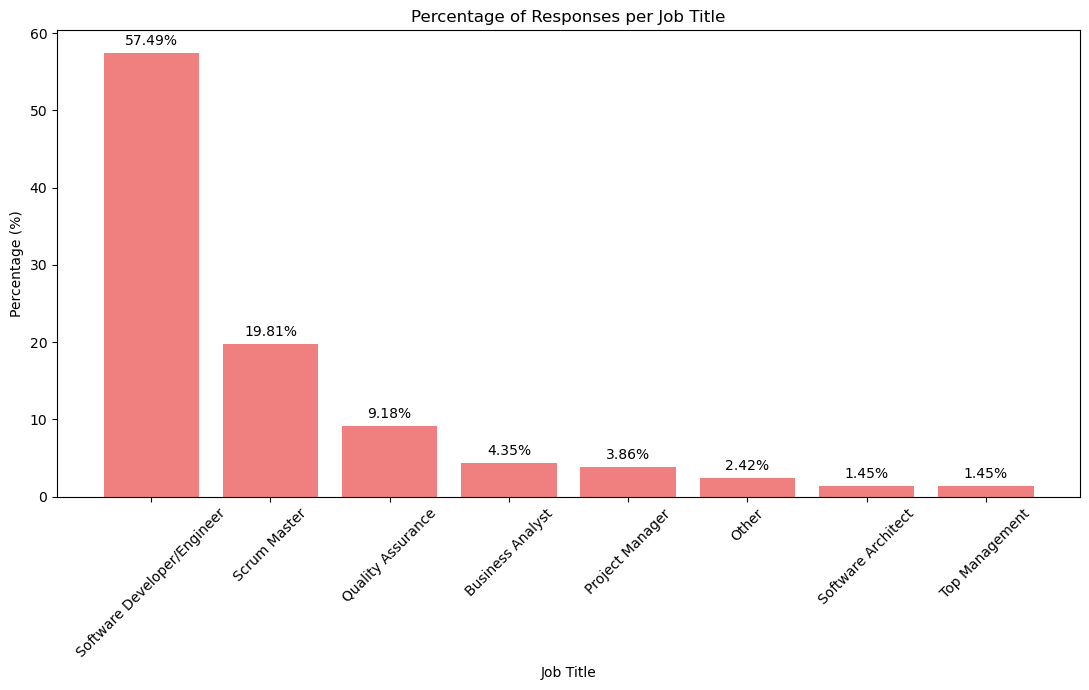

In [73]:
# Count the occurrences of each job title
job_title_counts = df['JobTitle'].value_counts().reset_index()
job_title_counts.columns = ['Job Title', 'Count']

# Calculate percentages
job_title_percentages = (job_title_counts['Count'] / job_title_counts['Count'].sum()) * 100

# Create a bar chart to visualize the job title percentages
plt.figure(figsize=(11, 7))
bars = plt.bar(job_title_counts['Job Title'], job_title_percentages, color='lightcoral')  # Change the color
plt.xlabel('Job Title')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Responses per Job Title')

# Show the chart
plt.xticks(rotation=45)  # Rotate the job title labels for better readability

# Add percentages as labels above the bars with padding
for bar, percentage in zip(bars, job_title_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + height_padding, f'{percentage:.2f}%', ha='center')

plt.tight_layout()
plt.show()

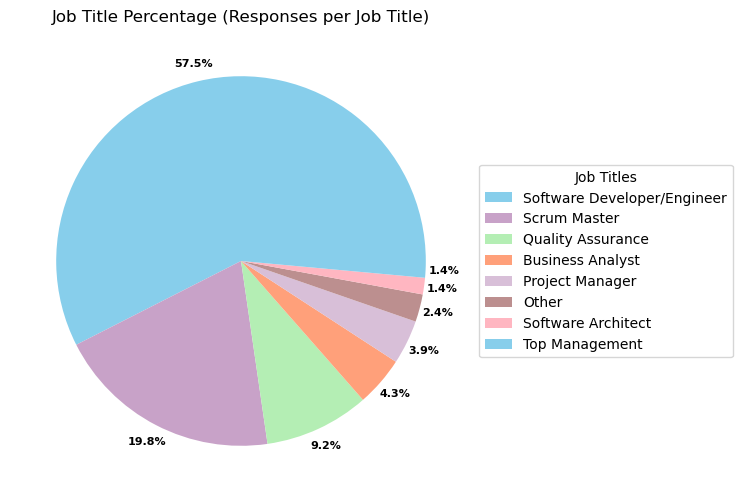

In [75]:
# Count the occurrences of each job title
job_title_counts = df['JobTitle'].value_counts()

# Calculate percentages
job_title_percentages = (job_title_counts / job_title_counts.sum()) * 100


# Create pie chart with labels outside
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(job_title_percentages, autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2, startangle=0, colors=colors)
plt.setp(autotexts, size=8, weight="bold")
ax.legend(wedges, job_title_percentages.index, title="Job Titles", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Job Title Percentage (Responses per Job Title)')
plt.show()

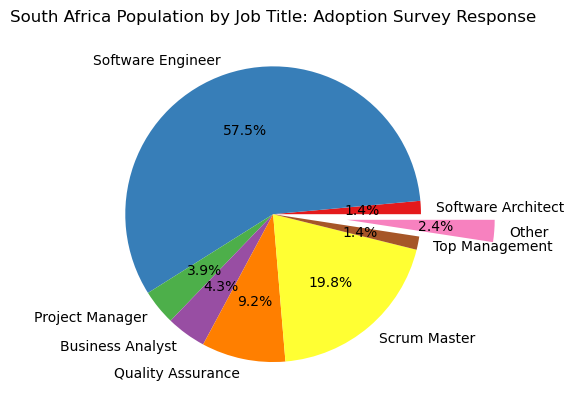

In [57]:
# respondents by job title percentage
title_population = df.groupby('B2').size() #JobTitle
titles = ['Software Architect', 'Software Engineer', 'Project Manager', 'Business Analyst', 'Quality Assurance', 'Scrum Master', 'Top Management', 'Other']
# only "explode" the 4th  (i.e. 'North West')
explode = (0, 0, 0, 0, 0, 0, 0, 0.5)  

plt.pie(title_population, explode= explode, labels=titles, autopct='%1.1f%%',colors=sns.color_palette("Set1")
        )
plt.title('South Africa Population by Job Title: Adoption Survey Response')
plt.show()

In [87]:
# Create a mapping dictionary
# Under 18 and 60+ resulted in the survey being over
mapping = {
    1: 'Under 18',
    2: '18 – 20 years',
    3: '21 – 23 years',
    4: '24 – 28 years',
    5: '29 – 38 years',
    6: '39 – 59 years',
    7: '60 and over'
}

# Apply the mapping to create a new column with names
df['AgeGroup'] = df['A3'].map(mapping)

# Display the DataFrame
df

,A1,A2,A3,B1,B2,B3,B4,C1_1,C1_2,C1_3,...,rD1_12,rD1_9,rC1_10,rC1_11,rC1_9,rC1_8,rC1_12,ProvinceMappingToB1,JobTitle,AgeGroup
0,1,3,6,1,1,4,4,7,7,6,...,2,2,5,5,2,6,1,Eastern Cape,Software Architect,39 – 59 years
1,1,4,5,1,2,4,3,3,3,3,...,4,4,5,6,6,6,6,Eastern Cape,Software Developer/Engineer,29 – 38 years
2,1,2,4,1,2,3,1,7,6,4,...,2,2,6,4,2,2,2,Eastern Cape,Software Developer/Engineer,24 – 28 years
3,1,4,4,1,2,4,3,6,6,5,...,4,4,4,4,4,4,1,Eastern Cape,Software Developer/Engineer,24 – 28 years
4,1,4,4,1,2,4,3,3,7,5,...,5,3,7,5,6,6,4,Eastern Cape,Software Developer/Engineer,24 – 28 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1,6,5,9,2,6,3,7,6,6,...,4,2,6,4,6,4,3,Western Cape,Software Developer/Engineer,29 – 38 years
203,1,5,6,9,6,7,7,7,7,7,...,1,1,6,7,6,6,6,Western Cape,Scrum Master,39 – 59 years
204,1,3,5,9,5,6,2,6,6,6,...,2,2,6,6,6,6,2,Western Cape,Quality Assurance,29 – 38 years
205,1,5,5,9,2,4,3,6,7,7,...,1,1,4,4,4,2,2,Western Cape,Software Developer/Engineer,29 – 38 years


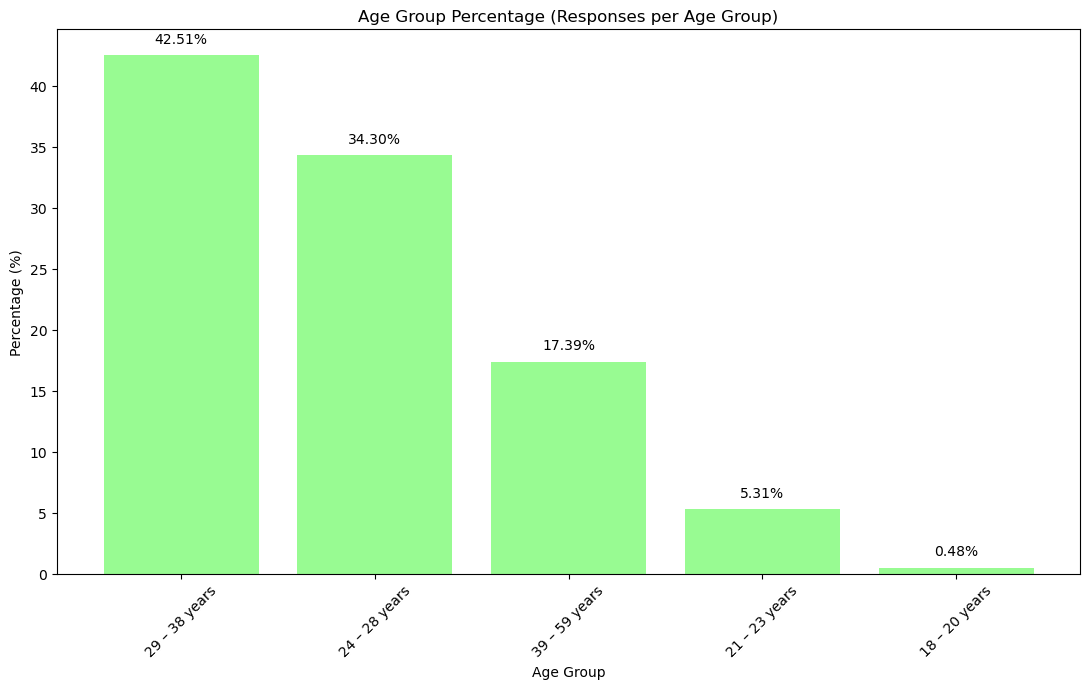

In [89]:
# Count the occurrences of each age group
age_group_counts = df['AgeGroup'].value_counts().reset_index()
age_group_counts.columns = ['Age Group', 'Count']

# Calculate percentages
age_percentages = (age_group_counts['Count'] / age_group_counts['Count'].sum()) * 100

# Create a bar chart to visualize the age group percentages
plt.figure(figsize=(11, 7))
bars = plt.bar(age_group_counts['Age Group'], age_percentages, color='#98FB92')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.title('Age Group Percentage (Responses per Age Group)')

# Show the chart
plt.xticks(rotation=45)  # Rotate the age group labels for better readability

# Add percentages as labels above the bars with padding
for bar, percentage in zip(bars, age_percentages):
    height_padding = 2 if percentage == 49.76 else 1  # Add more padding for 49.76%
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + height_padding, f'{percentage:.2f}%', ha='center')

plt.tight_layout()
plt.show()

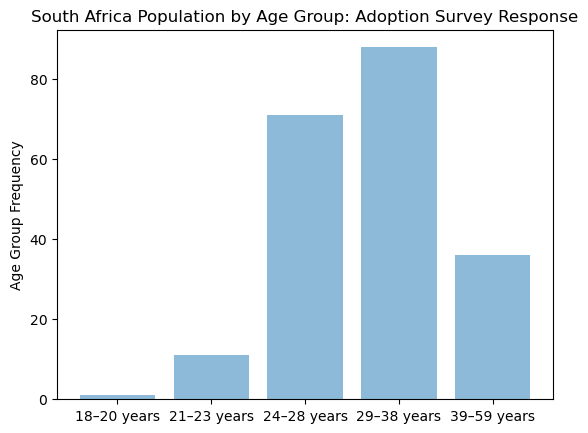

In [83]:
# respondents by age group frequency
titles = ('18–20 years', '21–23 years', '24–28 years', '29–38 years', '39–59 years')
y_pos = np.arange(len(titles))
ageGroups = df.groupby('A3').size() #AgeGroup

plt.bar(y_pos, ageGroups, align='center', alpha=0.5)
plt.xticks(y_pos, titles)
plt.ylabel('Age Group Frequency')
plt.title('South Africa Population by Age Group: Adoption Survey Response')

plt.show()

In [97]:
df2

,experience,OrganisationalBehaviour,rSprintManagement,Relativeadvantage,Training,Specialization,Recognition,Customercollaboration,Compatibility,Escalationofcommitment,Complexity,rTeamwork,ResourceManagement,rOverEngineering,adoption
0,6.75,2.90909,1.750,5.77778,6.00,6.00,3.75,2.50000,6.00000,6.00000,5.00000,2.000,2.00,3.8,4.66667
1,2.75,4.36364,4.500,5.77778,3.00,4.00,4.50,2.33333,5.33333,2.00000,6.00000,5.250,4.00,5.8,5.66667
2,6.00,6.00000,5.750,6.00000,6.25,6.00,6.00,6.00000,6.00000,6.00000,6.00000,5.750,6.00,3.2,5.00000
3,6.00,5.63636,4.375,6.00000,6.00,4.25,4.25,5.66667,6.00000,6.33333,6.00000,5.125,5.50,3.4,5.00000
4,5.50,4.36364,4.500,6.77778,1.00,5.00,2.75,5.50000,7.00000,5.33333,6.66667,6.500,6.50,5.6,5.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,6.25,5.45455,4.375,5.77778,6.00,5.00,6.00,5.00000,6.00000,6.66667,4.66667,4.875,5.50,4.6,5.00000
203,7.00,2.36364,4.875,4.11111,3.00,6.50,2.00,6.33333,5.00000,7.00000,3.00000,4.000,1.25,6.2,5.33333
204,6.00,4.00000,6.000,4.66667,4.00,6.00,4.00,4.16667,4.66667,6.00000,4.00000,5.875,5.00,5.2,4.00000
205,6.75,5.45455,5.250,6.88889,6.00,7.00,4.50,6.83333,7.00000,7.00000,6.00000,4.375,6.25,3.2,6.00000


In [99]:
#used to calculate the correlation matrix for numerical columns
df2.corr()

,experience,OrganisationalBehaviour,rSprintManagement,Relativeadvantage,Training,Specialization,Recognition,Customercollaboration,Compatibility,Escalationofcommitment,Complexity,rTeamwork,ResourceManagement,rOverEngineering,adoption
experience,1.000000,0.060712,0.200496,0.233160,0.260337,0.229130,0.159043,0.123684,0.095890,0.444036,0.169171,0.098476,0.020847,-0.045647,0.166190
OrganisationalBehaviour,0.060712,1.000000,0.198868,0.238061,0.577684,0.246473,0.648495,0.727642,0.268192,0.309421,0.320392,0.146295,0.627416,-0.195979,0.210098
rSprintManagement,0.200496,0.198868,1.000000,0.054358,0.177558,-0.082513,0.060441,0.214516,0.012456,0.013077,0.072399,0.736835,0.117179,0.302416,0.203107
Relativeadvantage,0.233160,0.238061,0.054358,1.000000,0.217139,0.220108,0.179340,0.207133,0.598367,0.251196,0.592198,-0.030313,0.188282,-0.024319,0.689647
Training,0.260337,0.577684,0.177558,0.217139,1.000000,0.232322,0.668914,0.552605,0.129179,0.237435,0.230185,0.044683,0.420003,-0.030054,0.153680
Specialization,0.229130,0.246473,-0.082513,0.220108,0.232322,1.000000,0.219983,0.296924,0.229978,0.317203,0.281436,-0.123155,0.257623,-0.211746,0.140824
Recognition,0.159043,0.648495,0.060441,0.179340,0.668914,0.219983,1.000000,0.555535,0.178851,0.206955,0.327229,0.039042,0.538003,-0.110342,0.096374
Customercollaboration,0.123684,0.727642,0.214516,0.207133,0.552605,0.296924,0.555535,1.000000,0.164213,0.284328,0.320967,0.112464,0.619711,-0.150402,0.225716
Compatibility,0.095890,0.268192,0.012456,0.598367,0.129179,0.229978,0.178851,0.164213,1.000000,0.216695,0.567024,-0.051608,0.208634,-0.066484,0.443082
Escalationofcommitment,0.444036,0.309421,0.013077,0.251196,0.237435,0.317203,0.206955,0.284328,0.216695,1.000000,0.292419,-0.043729,0.242056,-0.365369,0.176176


In [101]:
#Mask for heatmap
mask = np.zeros_like(df2.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.

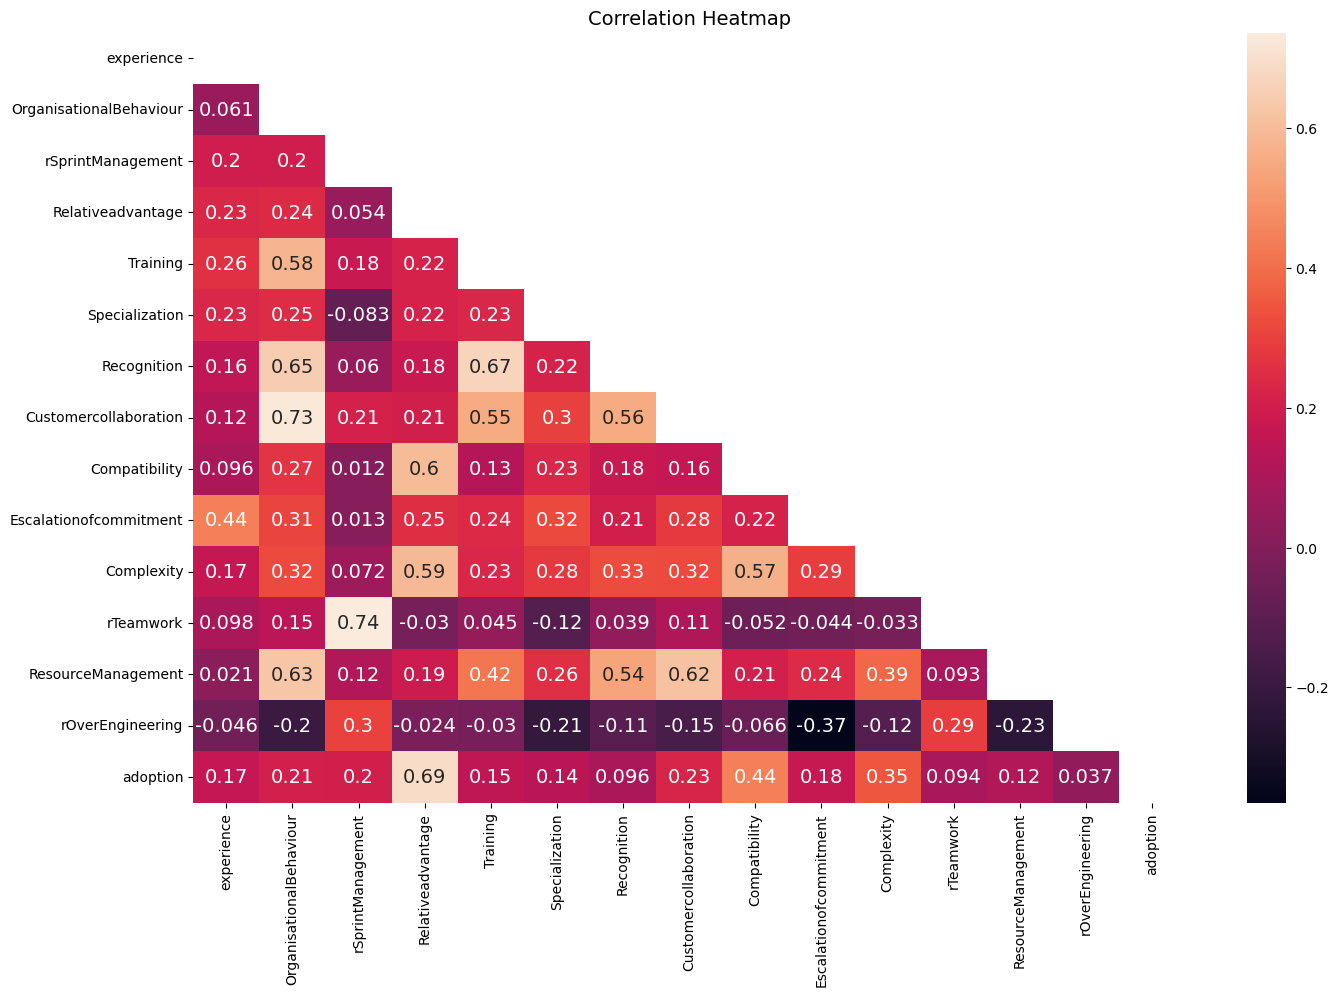

In [103]:
#Heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(df2.corr(), mask=mask, annot=True, annot_kws={'size': 14}) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

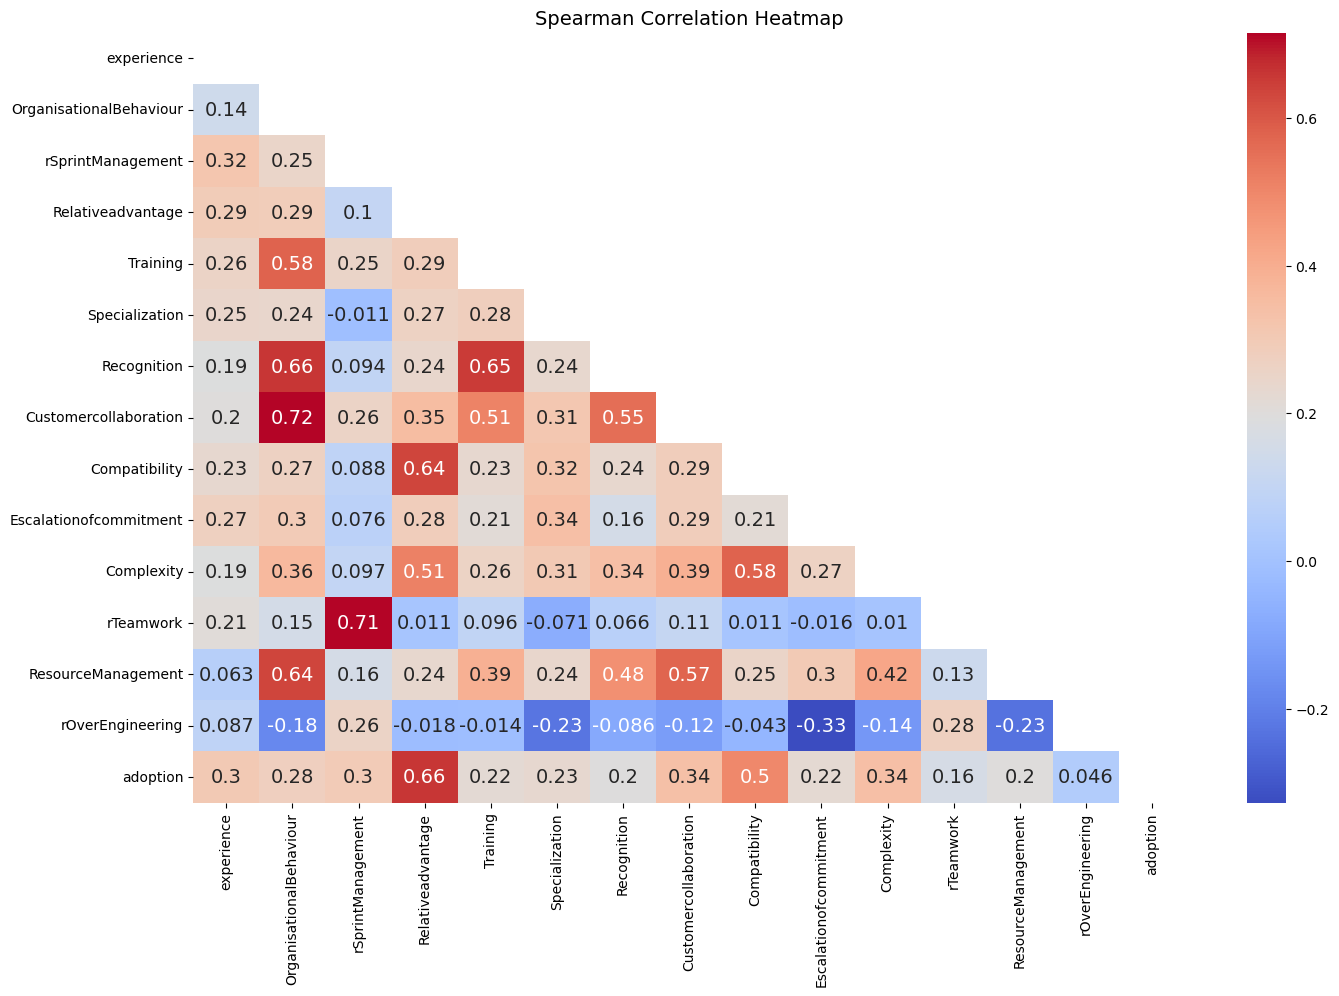

In [107]:
# Calculate Spearman correlation matrix
#Spearman correlation matrix measures the rank-order correlation between variables, as opposed to the standard Pearson correlation, which measures linear correlation. 
spearman_corr = df2.corr(method='spearman')

# Create a mask for the upper triangle
mask = np.zeros_like(spearman_corr)
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

# Create a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(spearman_corr, mask=mask, annot=True, annot_kws={'size': 14}, cmap='coolwarm')
plt.yticks(fontsize=10)
plt.title('Spearman Correlation Heatmap', fontsize=14)
plt.show()

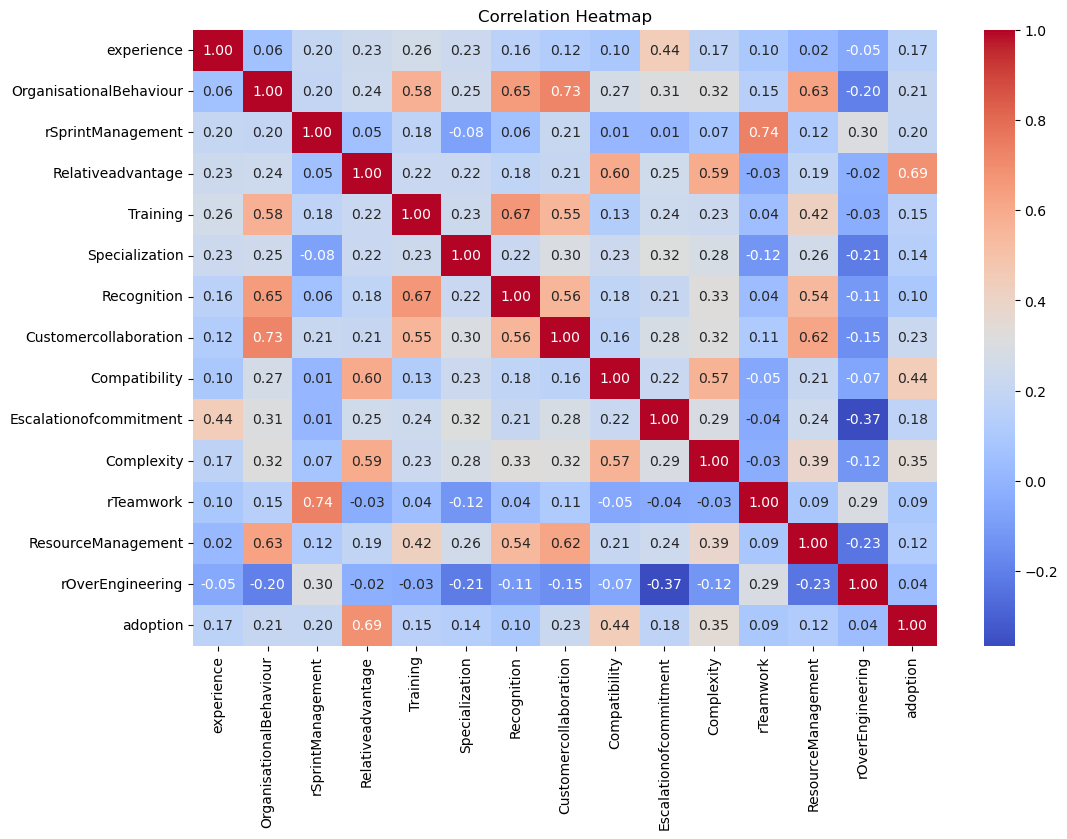

In [105]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df2.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [143]:
# Step 1: Data Split

from sklearn.model_selection import train_test_split

# Define your feature columns and target column
features = [
    'experience', 'OrganisationalBehaviour', 'rSprintManagement', 'Relativeadvantage',
    'Training', 'Specialization', 'Recognition', 'Customercollaboration', 'Compatibility',
    'Escalationofcommitment', 'Complexity', 'rTeamwork', 'ResourceManagement', 'rOverEngineering'
]

target = 'adoption'

# Split your dataset into train (70%) and test (30%) sets
# The dataset was split into a 69.57% training set and 30.43% test set. 
X_train, X_test, y_train, y_test = train_test_split(df2[features], df2[target], test_size=0.3, random_state=4)

In [137]:
#calculating the proportion of the total data that is being used for training. 
#This should return 0.7, since you’re using 70% of the data for training (test_size=0.3). 
#This is a good way to verify that your data has been split correctly.
proportion_training = len(X_train) / len(df2)
print(proportion_training)

0.6956521739130435


In [167]:
# Select features (X) and target variable (y)
X = df2[['experience', 'OrganisationalBehaviour', 'rSprintManagement', 'Relativeadvantage',
    'Training', 'Specialization', 'Recognition', 'Customercollaboration', 'Compatibility',
    'Escalationofcommitment', 'Complexity', 'rTeamwork', 'ResourceManagement', 'rOverEngineering']]  # Features
y = df2['adoption']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [169]:
#calculating the proportion of the total data that is being used for training. 
#This should return 0.7, since you’re using 70% of the data for training (test_size=0.3). 
#This is a good way to verify that your data has been split correctly.
proportion_training = len(X_train) / len(df2)
print(proportion_training)

0.7971014492753623


In [173]:
# Import the necessary libraries for the project

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [179]:
# % of test data set
X_test.shape[0]/features.shape[0]

AttributeError: 'list' object has no attribute 'shape'

In [163]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import statsmodels.api as sm


In [153]:
# Step 4: Model B evaluation (Log Transformation Full Feature Set Model)

# (a) Coefficients
coefficients = model_b.coef_
intercept = model_b.intercept_
coef_df = pd.DataFrame(data=coefficients, index=features, columns=['Coefficient'])
print('Intercept (Model B):', intercept)
print(coef_df)
print('\n')

# (b & c) P-values and VIF
# Fit the model with statsmodels to obtain p-values
X_train_log = sm.add_constant(X_train_log)
model_b_stats = sm.OLS(y_train, X_train_log).fit()

# Get the p-values
p_values = model_b_stats.pvalues

# Calculate VIF
vif = 1 / (1 - model_b_stats.rsquared)

# Create a DataFrame to display p-values
p_values_df = pd.DataFrame(data=p_values, index=X_train_log.columns, columns=['P-value'])

# Display the p-values and VIF
print('P-values (Model B):')
print(p_values_df)
print('\n')
print('VIF (Model B):', vif)
print('\n')


# Step 5: Bayesian Information Criterion (BIC) for all 3 models
n = len(X_train)
bic_a = n * np.log(mse_a) + len(features) * np.log(n)
bic_b = n * np.log(mse_b) + len(features) * np.log(n)
bic_c = n * np.log(mse_c) + len(reduced_features) * np.log(n)

# Create a DataFrame to display BIC
bic_df = pd.DataFrame({
    'Model': ['Full Feature Set', 'Log Transformation Full Feature Set', 'Log Transformation Reduced Feature Set'],
    'BIC': [bic_a, bic_b, bic_c]
})

print('BIC for All Models:')
print(bic_df.to_string(index=False))
print('\n')

Intercept (Model B): -3.877627918034812
                         Coefficient
experience                 -0.517152
OrganisationalBehaviour    -0.365477
rSprintManagement           0.785299
Relativeadvantage           5.238726
Training                   -0.175122
Specialization              0.035208
Recognition                 0.127582
Customercollaboration       0.650143
Compatibility               0.119657
Escalationofcommitment      0.007897
Complexity                 -0.804487
rTeamwork                  -0.064142
ResourceManagement         -0.118277
rOverEngineering           -0.252567


P-values (Model B):
                              P-value
const                    2.405049e-04
experience               1.403143e-01
OrganisationalBehaviour  4.598927e-01
rSprintManagement        1.316797e-02
Relativeadvantage        1.557625e-16
Training                 5.608998e-01
Specialization           9.081211e-01
Recognition              6.646959e-01
Customercollaboration    1.627844e-01
Com

NameError: name 'mse_c' is not defined

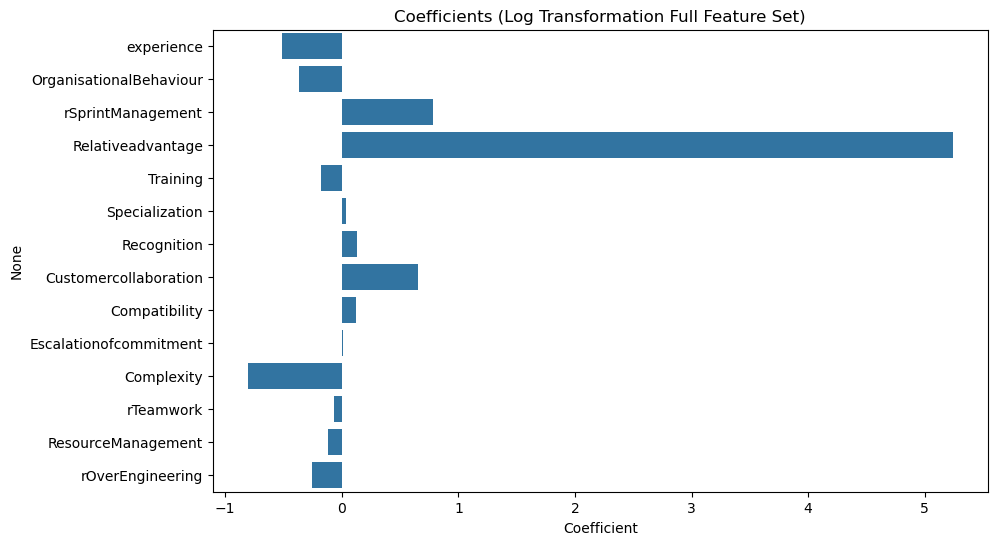

In [155]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y=coef_df.index, data=coef_df, orient='h')
plt.title('Coefficients (Log Transformation Full Feature Set)')
plt.show()